In [2]:
! pip install tensorflow numpy scikit-learn matplotlib seaborn

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

np.random.seed(42)
tf.random.set_seed(42)

1. Load and Preprocess the MNIST Dataset

Load the MNIST dataset using TensorFlow/Keras

In [24]:
(x_train_data, y_train_data), (x_val_data, y_val_data) = keras.datasets.mnist.load_data()

Normalize the image pixel values to be between 0 and 1
Convert labels into one-hot encoded format
Split the dataset into training and test sets
Display sample images with their corresponding labels

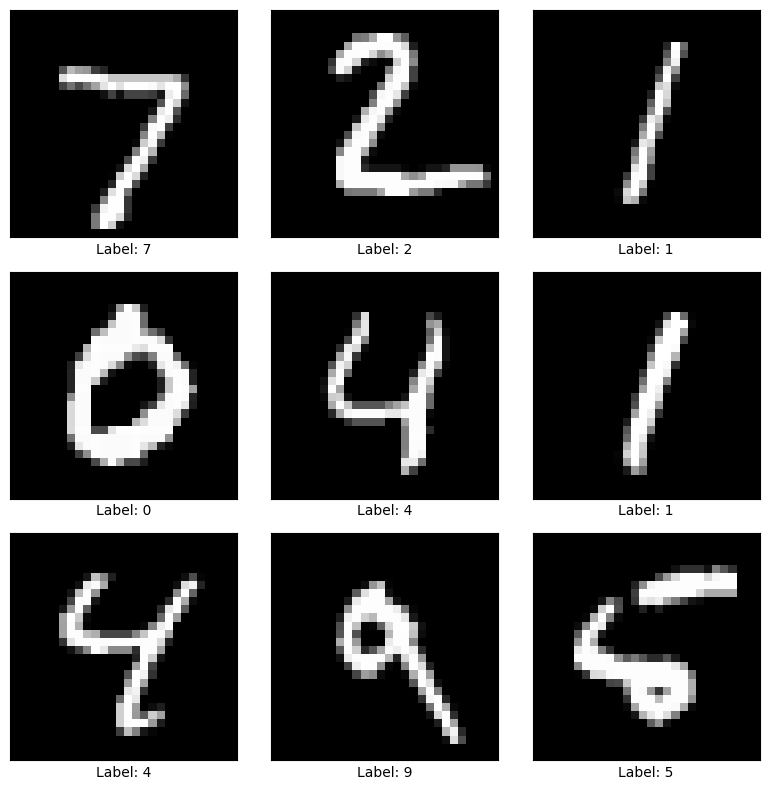

In [25]:
x_train_data = tf.cast(x_train_data, tf.float32) / 255.0  # Normalize pixel values
x_val_data = tf.cast(x_val_data, tf.float32) / 255.0

y_train_data = tf.one_hot(y_train_data, depth=10)
y_val_data = tf.one_hot(y_val_data, depth=10)

# If y_val_data is one-hot encoded, convert to class indices:
if len(y_val_data.shape) > 1 and y_val_data.shape[1] > 1:
    y_val_labels = np.argmax(y_val_data, axis=1)
else:
    y_val_labels = y_val_data

# Number of images to display
num_images = 9

plt.figure(figsize=(8,8))

for i in range(num_images):
    plt.subplot(3, 3, i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)
    plt.imshow(x_val_data[i], cmap='gray')  # Show image in grayscale
    plt.xlabel(f"Label: {y_val_labels[i]}")

plt.tight_layout()
plt.show()


2. Build a Fully Connected Neural Network

Define a sequential model using Keras
Flatten the 28x28 input images into a single vector
Add two hidden layers with ReLU activation
Add an output layer with Softmax activation for multi-class classification
Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric

In [26]:
#Define a sequential model using Keras Flatten the 28x28 input images into a single vector
#Add two hidden layers with ReLU activation Add an output layer with Softmax activation for multi-class classification
My_model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),  # Flatten the input
    keras.layers.Dense(units=256, activation='relu'),                    # Hidden layer 1 : A layer with 256 neurons and the ReLU activation function.
    keras.layers.Dense(units=128, activation='relu'),                    # Hidden layer 2 : A layer with 128 neurons for more learning power.
    keras.layers.Dense(units=10, activation='softmax')                   # Output layer :  Outputs 10 probabilities (one for each class).
])
#Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric
My_model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3. Train the Neural Network

Fit the model to the training data for 10 epochs
Use a validation set to track performance during training
Observe the loss and accuracy trends over the epochs

In [27]:
history = My_model.fit(
    x = x_train_data,
    y = y_train_data,
    batch_size = 32,
    epochs=10,
    steps_per_epoch=500,
    validation_data=(x_val_data, y_val_data),
    validation_steps=2
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8158 - loss: 0.6204 - val_accuracy: 0.9688 - val_loss: 0.1559
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9462 - loss: 0.1785 - val_accuracy: 0.9688 - val_loss: 0.0747
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9556 - loss: 0.1447 - val_accuracy: 0.9844 - val_loss: 0.0529
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9625 - loss: 0.1226 - val_accuracy: 0.9688 - val_loss: 0.0602
Epoch 5/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9721 - loss: 0.0976 - val_accuracy: 0.9844 - val_loss: 0.0442
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9744 - loss: 0.0818 - val_accuracy: 0.9844 - val_loss: 0.0331
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0781 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9759 - loss: 0.0751 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9837 - loss: 0.0563 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0548 - val_accuracy: 1.0000 - val_loss: 0.0157


4. Evaluate the Model’s Performance

Compute accuracy on the test dataset
Display a confusion matrix for misclassified digits
Identify which digits the model struggles with the most

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9662 - loss: 0.1117
Test Accuracy: 0.97
{'accuracy': 0.9714, 'precision': 0.9716824324691322, 'recall': 0.9714, 'f1': 0.9714077433455394}


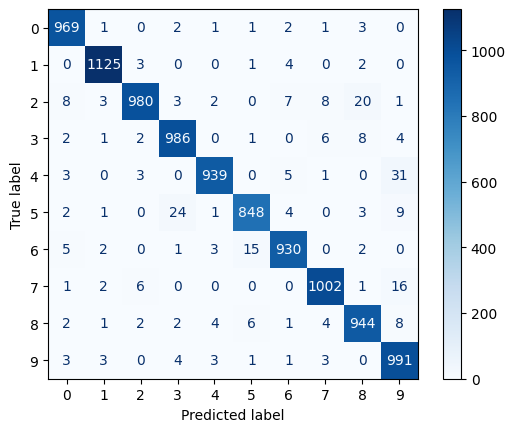

In [28]:
Make_predictions = My_model.predict(x_val_data)
Make_predictions = np.argmax(Make_predictions, axis=1)
print(Make_predictions)

test_loss, test_accuracy = My_model.evaluate(x = x_val_data, y = y_val_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

y_val_data = np.argmax(y_val_data, axis=1)
metrics = {
    'accuracy': accuracy_score(y_val_data, Make_predictions),
    'precision': precision_score(y_val_data, Make_predictions, average='weighted'),
    'recall': recall_score(y_val_data, Make_predictions, average='weighted'),
    'f1': f1_score(y_val_data, Make_predictions, average='weighted')
}

print(metrics)

# Compute confusion matrix
cm = confusion_matrix(y_val_data, Make_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')